In [1]:
# !pip install hypernetx

In [2]:
# !pip install networkx

In [3]:
import os, json
import numpy as np
import pandas as pd

from networkx.drawing import spring_layout
import hypernetx as hnx
import lesmis
from hypernetx.drawing.rubber_band import draw

import matplotlib.pyplot as plt
%matplotlib inline

# Construction
We start with a list of scenes, and construct a hypergraph by converting this to a dictionary.

In [4]:
scenes = [
    ('FN', 'TH'),
    ('TH', 'JV'),
    ('BM', 'FN', 'JA'),
    ('JV', 'JU', 'CH', 'BM'),
    ('JU', 'CH', 'BR', 'CN', 'CC', 'JV', 'BM'),
    ('TH', 'GP'),
    ('GP', 'MP'),
    ('MA', 'GP')
]

H = hnx.Hypergraph(dict(enumerate(scenes)))
H.edges.incidence_dict

{0: {'FN', 'TH'},
 1: {'JV', 'TH'},
 2: {'BM', 'FN', 'JA'},
 3: {'BM', 'CH', 'JU', 'JV'},
 4: {'BM', 'BR', 'CC', 'CH', 'CN', 'JU', 'JV'},
 5: {'GP', 'TH'},
 6: {'GP', 'MP'},
 7: {'GP', 'MA'}}

In [5]:
H.dual().edges.incidence_dict

{'TH': {0, 1, 5},
 'FN': {0, 2},
 'JV': {1, 3, 4},
 'BM': {2, 3, 4},
 'JA': {2},
 'JU': {3, 4},
 'CH': {3, 4},
 'CN': {4},
 'CC': {4},
 'BR': {4},
 'GP': {5, 6, 7},
 'MP': {6},
 'MA': {7}}

# Visualization
Use the default drawing tool to visualize `H` and its dual.

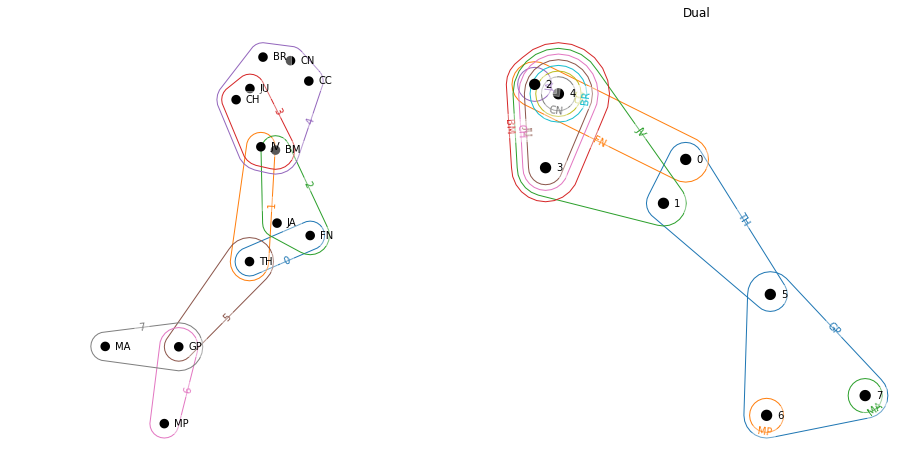

In [6]:
plt.figure(figsize=(16, 8))
draw(H, ax=plt.subplot(121))
draw(H.dual(), ax=plt.subplot(122))
plt.title('Dual');

# Book Tours
A book tour is a `Series` of `Hypergraph`'s from Les Miserables indexed hierarchically by Volume and Book.

In [7]:
book_tour = lesmis.book_tour_data()
book_tour.head()

Volume  Book
1       1       (MB, MY, NP, ME, CL, GE, MC, CV, SN, GG)
        2           (MR, JL, MT, JV, MB, ME, MY, IS, PG)
        3               (BL, FT, FA, LI, ZE, FV, DA, FN)
        4                               (TH, TM, FN, CO)
        5               (JV, MY, JA, FF, VI, FN, MT, BM)
dtype: object

# Book Tour Visualization (small multiples)
Draw one hypergraph for each of the `{Volume x Book}` pairs in Les Miserables. Volumes are rows and books are columns.


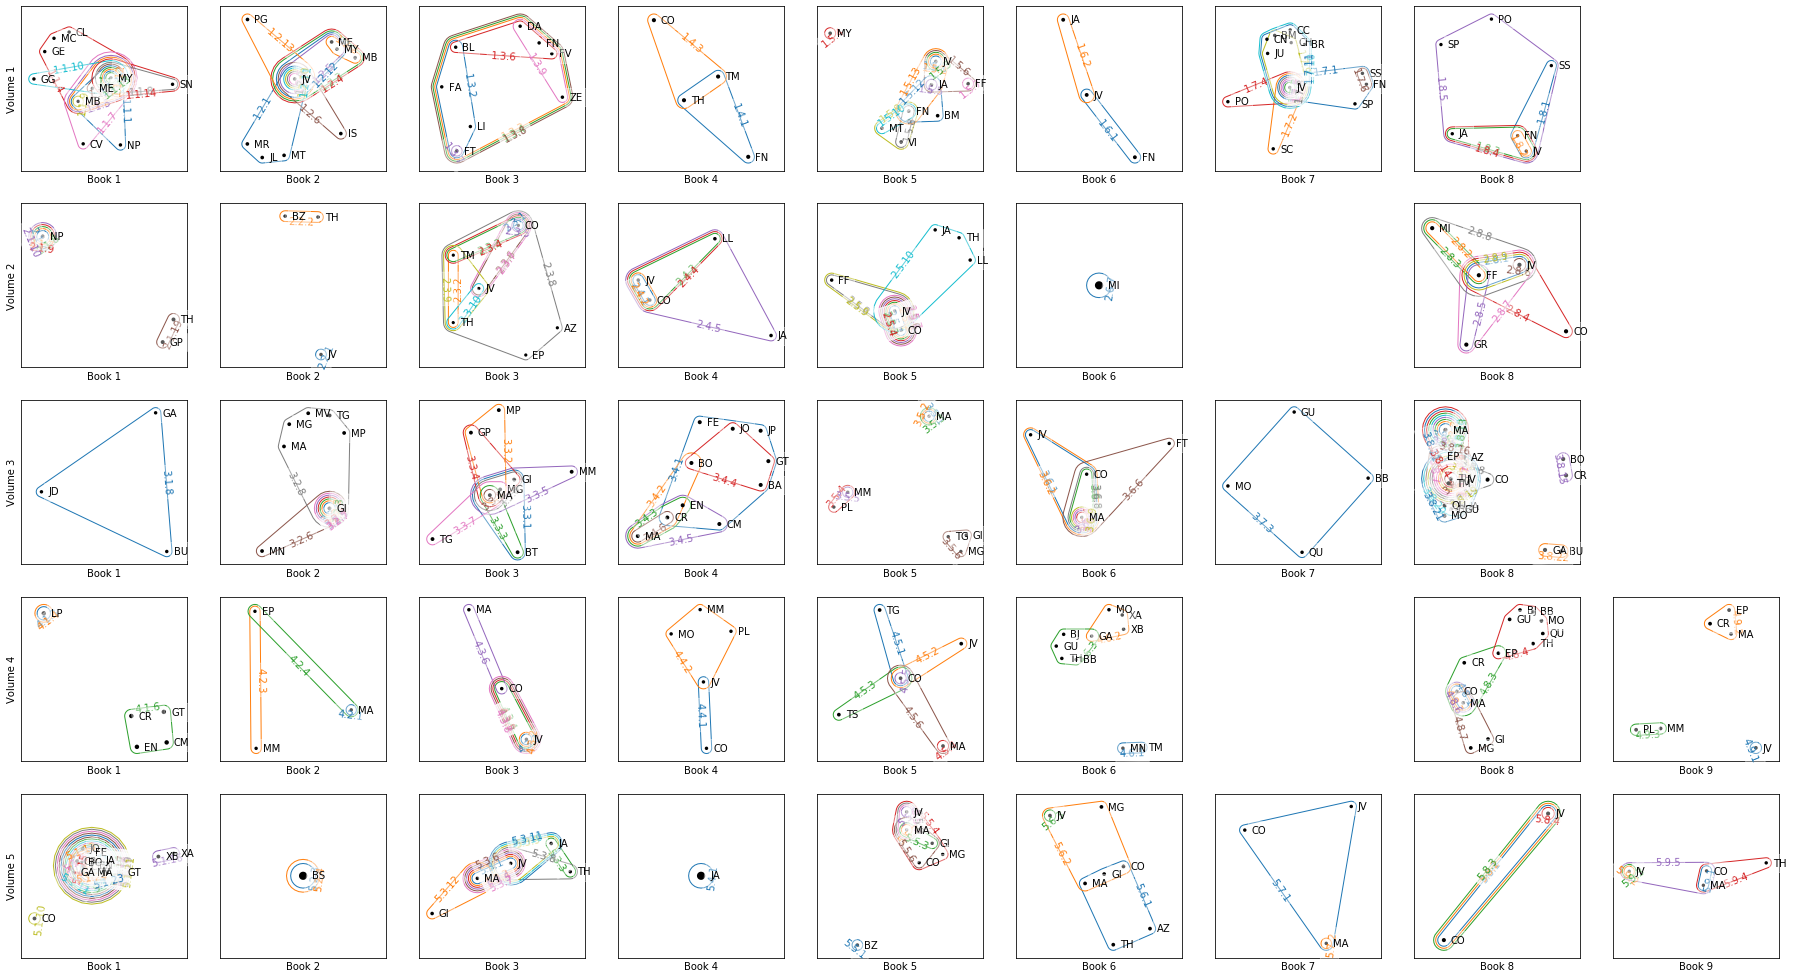

In [8]:
for t, Ht, ax in lesmis.book_tour():
    draw(Ht, layout=spring_layout, ax=ax, with_edge_counts=True)
    ax.axis('on')

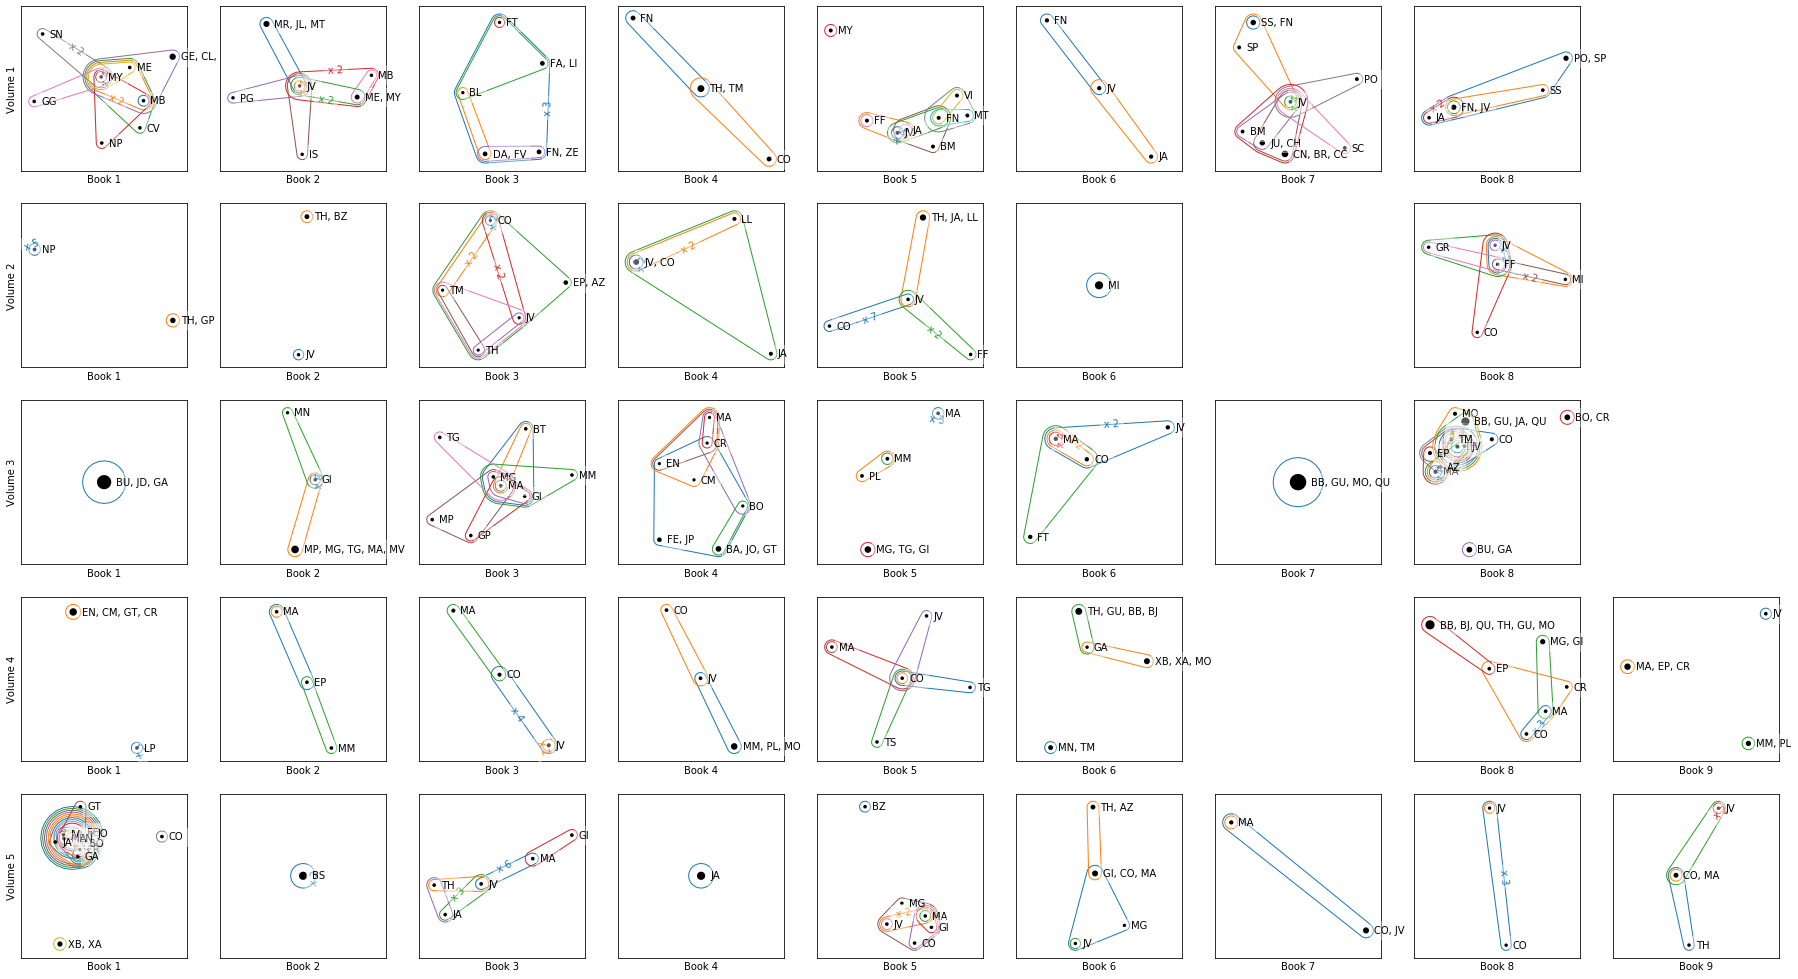

In [9]:
for t, Ht, ax in lesmis.book_tour():
    Ht = Ht.collapse_nodes_and_edges()
    draw(Ht, layout=spring_layout, ax=ax, with_edge_counts=True)
    ax.axis('on')